<a href="https://colab.research.google.com/github/Geon27/4-1-Boston_housin/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1(1127).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이썬 

- 나의 구글 드라이브와 구글 코랩의 연결  
- 이 과정(마운트)을 통해 나의 구글 드라이브내의 데이터를 구글 코랩에 로드하고 또한 분석된 내용을 저장하는것도 가능하게 됨

In [ ]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive') 

# 아래 출력되는 URL에 접속하여 이용 동의 후 생성되는 인증코드를 복사해서 붙여넣기

Mounted at /content/drive


### 파이썬 패키지 설치

패키지라 함은 메인엔진은 파이썬이 잘 구현될 수 있도록 지원해주는 체계로서 패키지안에 함수나 클래스 등이 포함되어 있음  
패키지를 사용하려면 2단계(인스톨-로드)를 거치는데 로드는 매번 인스톨은 처음에 1회만 하면 되는데 구글 코랩에서는 단점으로서 클라우드 방식이므로 인스톨을 매번해주어야 하는 번거로움이 있음

#### 패키지 로드

아래 코드는 인스톨 코드이므로 후에 로드를 다시 해주어야 함  
코랩에서는 다른 파이썬 IDE와 다르게 이미 필요한 패키지들이 설치되어 있어서 비교적 편리함  
다만 어떤 패키지는 버전에 따라 상황이 달라질 수 있으므로 같은 패키지여도 필요한 버전을 추가로 설치해야 하는 경우도 발생될 수 있음

패키지 설치와 로드는 바디만 있는 깡통자동차에 필요한 도구들을 설치하는 것과 같음. 예를 들어 필요한 경우 에어콘(패키지)을 자동차에 설치(패키지 인스톨)하여 스위치(패키지 로드)를 켜야 에어콘을 사용할 수 있는 것과 같은 원리임.
코랩의 경우 필요한 패키지가 미리 설치되어 있는 경우가 있음. 미리 설치되지 않은 것말 추가로 인스톨 해야함

In [ ]:
# !pip uninstall scipy -y
# !pip uninstall pingouin -y
!pip install pingouin
# !pip install statsmodels==0.13.1
!pip install sidetable
# !pip install researchpy 
# !pip install bioinfokit
# !pip install sidetable


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 12.7 MB/s 
     |████████████████████████████████| 9.9 MB 64.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196208 sha256=ae08f482c0490325ed0cd9bbb7b76e9617b922bdec06262533b5ffabf22e5c66
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=8f131f9f8ca888855e40a2636c114b6b0e6d859d04bfe6f22fde6c57a9fa11c5
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simpl

패키지 인스톨 명령어 `"!pip install 패키지이름"`로 인스톨함

#### 패키지 로드

In [ ]:
import seaborn as sns
import pandas as pd
#import datatable as dt
import scipy.stats as ss
from sklearn import datasets
import numpy
import sidetable 
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.options.display.float_format = lambda x: f'{x:.3f}'
#pd.reset_option('display.float_format')

## 데이터로드

바로 아래의 R버전은 파이썬과 대칭되어 동일한 명령을 R에서 수행할때의 코드이므로 참고하기 바람

In [ ]:
# #R버전
# # 데이터 로드: 엑셀파일
# # file.choose()
# Dataset <- read.xlsx(“경로”, sheet = 1) # 파일명: 관광수요_데이터_예제_R업로드_환경부.xlsx

# # 데이터 로드 확인
# dim(Dataset)                       # 데이터의 가로세로수 확인
# head(Dataset)                      # 데이터 앞부분(6개)확인
# names(Dataset)                     # 데이터셋내의 변수명 확인
# datatable(Dataset)                  # html형태로 데이터 로드 상태 확인


나의 구글 드라이브에서 원하는 데이터 파일을 찾아서(drive-My drive) 이에 대한 경로를 복사하여 아래 코드의 `' '`부분에 붙여 넣기  
아래의 경로는 이전 사용자의 고유경로이므로 바로 실행하면 에러가 발생될 수 있음

In [ ]:
##데이터 로드: 엑셀파일
# 파일명: housing.csv
Df = pd.read_csv('/content/drive/MyDrive/보스턴_데이터과학/housing.csv')

위 코드는 read_excel이라는 함수를 통해 엑셀(.xlsx)파일을 열어서 이를 Df라는 장소에 저장하는 것음. pd라는 것은 read_excel함수를 포함하고 있는 패키지(pandas, 판다스)의 줄인 이름임. 이에 대한 내용은 패키지 로드부분에 정의되어 있음  
pd.read_excel을 통해 도출된 데이터는 Dataset이라는 곳에 저장되게 됨

In [ ]:
#Df[1:1] #변수명만 추출
Df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

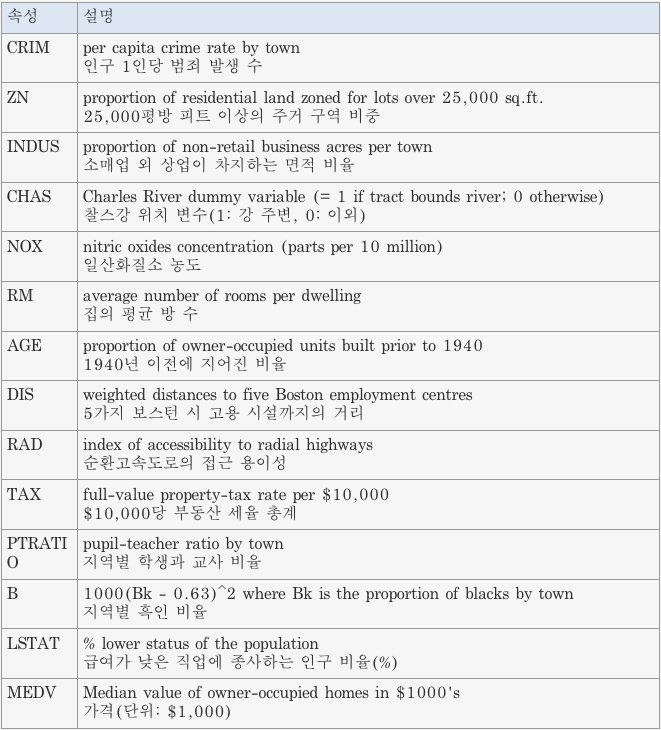

인덱싱이라고 해서 데이터의 일부분을 가져오고자 하는 경우 사용하는데 `:`을 기준으로 왼쪽이 행, 오른쪽이 열이 됨

In [ ]:
# 데이터 로드 확인
print(Df.shape)            # 데이터의 가로세로수 확인
print(Df.head())           # 데이터 앞부분(5개)확인
print(Df.tail())           # 데이터 뒷부분(5개)확인

(506, 14)
   CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0 0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1 0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2 0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3 0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4 0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   

        B  LSTAT   MEDV  
0 396.900  4.980 24.000  
1 396.900  9.140 21.600  
2 392.830  4.030 34.700  
3 394.630  2.940 33.400  
4 396.900  5.330 36.200  
     CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
501 0.063 0.000 11.930 0.000 0.573 6.593 69.100 2.479 1.000 273.000   21.000   
502 0.045 0.000 11.930 0.000 0.573 6.120 76.700 2.288 1.000 273.000   21.000   
503 0.061 0.000 11.930 0.000 0.573 6.976 91.000 2.167 1.000 273.000   21.000   
504 0.110 0.000 11.930 0.000 0.573 6.79

In [ ]:
Df = pd.DataFrame(Df) # 데이터 한눈에 보기
Df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700


In [ ]:
Df['TAX'].value_counts()

666.000    132
307.000     40
403.000     30
437.000     15
304.000     14
          ... 
285.000      1
198.000      1
256.000      1
244.000      1
313.000      1
Name: TAX, Length: 66, dtype: int64

위 데이터셋에서는 python_score에 영향을 주는 요인들로 gender, income, iq, toeic, math등이 있는 것을 알 수 있음. 이는 통계적 관점에서는 회귀분석 모델이며 머신러닝에서는 지도학습중 수치예측의 경우에 속함.  회귀분석에서는 영향을 주는 것을 독립변수라 하고 영향을 받는 것을 종속변수라고 하는데 머신러닝에서는 이를 각각 feature와 target이라고 명명함

### 질적 target에 대한 탐색적 분석

In [ ]:
Df['MEDV'].value_counts()

50.000    16
25.000     8
22.000     7
21.700     7
23.100     7
          ..
32.900     1
34.600     1
30.300     1
33.300     1
8.100      1
Name: MEDV, Length: 229, dtype: int64

In [ ]:
import sidetable as stb
Df.stb.freq(['MEDV'])

,MEDV,count,percent,cumulative_count,cumulative_percent
0,50.000,16,3.162,16,3.162
1,25.000,8,1.581,24,4.743
2,23.100,7,1.383,31,6.126
3,22.000,7,1.383,38,7.510
4,21.700,7,1.383,45,8.893
...,...,...,...,...,...
224,8.100,1,0.198,502,99.209
225,7.500,1,0.198,503,99.407
226,7.400,1,0.198,504,99.605
227,6.300,1,0.198,505,99.802


###여러변수의 기술통계분석: 양적변수

In [ ]:
# #R버전

# # 여러변수의 기술통계분석
# Dataset$region_tourist_num; Dataset$population
# target_vars <- subset(Dataset,select=c(region_tourist_num,population))

# # 여러변수에 대한 평균
# vars_mean <- sapply(target_vars, mean)
# round(vars_mean, 3)

# # 중앙값
# vars_median <- sapply(target_vars, median)
# round(vars_median, 3)



In [ ]:
#Dataset['region_tourist_num'], Dataset['population'] 단순출력
num_vars = Df[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]


In [ ]:
#target_vars = pd.DataFrame(target_vars)


In [ ]:
#여러변수에 대한 평균
vars_mean = numpy.mean(num_vars) 
round(vars_mean,3) #소수점 3자리 반올림

CRIM        3.614
ZN         11.364
INDUS      11.137
NOX         0.555
RM          6.285
AGE        68.575
DIS         3.795
RAD         9.549
TAX       408.237
PTRATIO    18.456
B         356.674
LSTAT      12.653
dtype: float64

In [ ]:
# 중앙값
#target_vars.target_vars()
vars_median = numpy.median(num_vars, axis=0)
#vars_median = target_vars.apply(numpy.median(target_vars), axis=1)
vars_median
#round(vars_median,3) #소수점 3자리 반올림

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 5.38000e-01, 6.20850e+00,
       7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02, 1.90500e+01,
       3.91440e+02, 1.13600e+01])

In [ ]:
Df_sub = num_vars.describe()
Df_sub

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,8.602,23.322,6.860,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,0.006,0.000,0.460,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,0.082,0.000,5.190,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,0.257,0.000,9.690,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,3.677,12.500,18.100,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,88.976,100.000,27.740,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970


In [ ]:
Df.info() #데이터정보확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 질적변수에 대한 탐색적 분석

In [ ]:
# var_nums  = Dataset[['egion_tourist_num','region_price_index','population','average_income','average_transport_cost']]
#Ever_Married, Graduated, Profession, Spending_Score
var_cate  = Df[["CHAS"]] # 'name',
var_cate

,CHAS
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000
...,...
501,0.000
502,0.000
503,0.000
504,0.000


In [ ]:
import sidetable as stb
for col in var_cate:
  print(var_cate.stb.freq([col]))

   CHAS  count  percent  cumulative_count  cumulative_percent
0 0.000    471   93.083               471              93.083
1 1.000     35    6.917               506             100.000


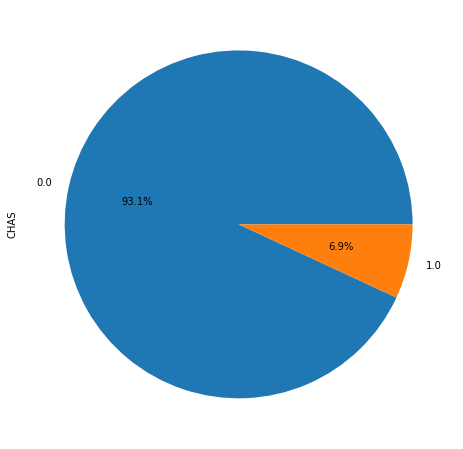

In [ ]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [12, 8]
# Pie chart
Df['CHAS'].value_counts().plot.pie(autopct='%1.1f%%') # 바꿔야 할 부분
plt.show()

In [ ]:
#문자형식으로 코딩된 질적변수를 더미변수로 코딩
Df_dummy = pd.get_dummies(Df, drop_first=True) # 기준변수를 0으로 만들어줌
Df_dummy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


In [ ]:
Df_dummy.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
target = Df_dummy['MEDV']

In [ ]:
target

0     24.000
1     21.600
2     34.700
3     33.400
4     36.200
       ...  
501   22.400
502   20.600
503   23.900
504   22.000
505   11.900
Name: MEDV, Length: 506, dtype: float64

In [ ]:
features = Df_dummy.drop(['MEDV'], axis = 1) # 여러개의 열을 삭제할 때
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480


In [ ]:
# features = Df_dummy[['Age', 'Work_Experience', 'Family_Size',
#        'Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
#        'Profession_Engineer', 'Profession_Entertainment',
#        'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
#        'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
#        'Spending_Score_Low']]
# 이와 같은 방식말고 불필요한것만 지정해서 뺀다고 한다면??

In [ ]:
print(features)

     CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0   0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1   0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2   0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3   0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4   0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   
..    ...    ...    ...   ...   ...   ...    ...   ...   ...     ...      ...   
501 0.063  0.000 11.930 0.000 0.573 6.593 69.100 2.479 1.000 273.000   21.000   
502 0.045  0.000 11.930 0.000 0.573 6.120 76.700 2.288 1.000 273.000   21.000   
503 0.061  0.000 11.930 0.000 0.573 6.976 91.000 2.167 1.000 273.000   21.000   
504 0.110  0.000 11.930 0.000 0.573 6.794 89.300 2.389 1.000 273.000   21.000   
505 0.047  0.000 11.930 0.000 0.573 6.030 80.800 2.505 1.000 273.000   21.000   

          B  LSTAT  
0   39

변수들의 표준화  
참고사이트: https://jimmy-ai.tistory.com/139

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

In [ ]:
scaler_standard.fit(features)
features_scaled=scaler_standard.transform(features)
print(features_scaled.shape)

(506, 13)


In [ ]:
print(features.head())
features_scaled

   CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0 0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1 0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2 0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3 0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4 0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   

        B  LSTAT  
0 396.900  4.980  
1 396.900  9.140  
2 392.830  4.030  
3 394.630  2.940  
4 396.900  5.330  


array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

분석하는 feature들의 단위가 서로 다를 수 있으므로 단위를 표준화할 필요가 있는데 이를 표준화라고 함. 한편 표준화 방법에는 여러가지 있음. 여기서는 `StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 특성의 스케일을 맞춥니다.`를 사용함

### 회귀분석용

In [ ]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
features_scaled_train, features_scaled_test, target_train, target_test = train_test_split(features_scaled, target, random_state=42)#, test_size=0.2, stratify=y
# 중요한 것은 42를 사용할 때마다 처음 분할 할 때 항상 동일한 출력을 얻는다
# stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다
# test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
# test_size와 stratify는 필요한 옵션이지만 데이터가 적은 경우 에러가 발생될 수 있음

X_scaled과 y에 대해 train_test_split을 실행하면 총 4개의 데이터셋(X_scaled_train, X_scaled_test, y_train, y_test) 생성됨

In [ ]:
print(features_scaled_train[:6])
print(target_train[:6])

[[-0.40992396 -0.48772236 -1.2660231  -0.27259857 -0.57613394  1.23997392
   0.84012202 -0.52026428 -0.75292215 -1.27835435 -0.30309415  0.41057102
  -1.09799011]
 [-0.00913688 -0.48772236  1.2319449   3.66839786  2.73234648 -0.18895873
   0.49874053 -0.97428934 -0.52300145 -0.03110494 -1.73641788 -2.94572872
   0.33178248]
 [-0.41635358  0.370669   -1.13908197 -0.27259857 -0.96572262  2.18737194
  -0.14490582  0.42766932 -0.52300145 -1.14175084 -1.64394538  0.33590374
  -1.24657432]
 [-0.37544025 -0.48772236  2.11761463 -0.27259857  0.22723076 -0.95684976
   0.96102797 -0.96872752 -0.8678825  -1.30805076  0.29797709  0.02868241
   2.04750959]
 [-0.41269248 -0.48772236 -1.15221381 -0.27259857 -0.81800718  0.06890449
  -1.82692087  0.67481374 -0.6379618   0.1292557  -0.71922039  0.203235
  -0.74475218]
 [-0.26286427 -0.48772236 -0.43725801 -0.27259857 -0.14421743 -0.30293142
   1.11749449  0.18061998 -0.6379618  -0.6012761   1.17646583  0.21990082
   0.05423839]]
182   37.900
155   15.6

In [ ]:
print(features_scaled_test[:6])
print(target_test[:6])

[[-0.40983668 -0.48772236 -1.03402724 -0.27259857 -0.38609067  0.18715116
   0.55208139 -0.54607682 -0.52300145 -0.66660821 -0.85792914  0.42570183
  -0.50645674]
 [-0.41394931  1.22906036 -0.68968118  3.66839786 -0.93030547  0.67438443
  -1.26861989  0.13431903 -0.6379618  -0.91605809 -0.39556665  0.44105193
  -1.27881429]
 [-0.40821211 -0.48772236  2.42256516 -0.27259857  0.469104   -0.42972605
   1.0748218  -0.91600909 -0.6379618   1.79819419  0.76033959  0.36660394
   0.75931252]
 [-0.40985297 -0.48772236 -0.04768006 -0.27259857 -1.22400869 -0.31290404
  -2.16119024  0.70937307 -0.6379618  -0.61315466  0.34421334  0.37537543
  -0.99986846]
 [ 0.17184212 -0.48772236  1.01599907 -0.27259857  1.36749033  0.01761678
   0.8258978  -0.67827698  1.66124525  1.53092646  0.80657583  0.31156286
   0.64717349]
 [-0.40870204 -0.48772236  0.24705682 -0.27259857 -1.01668877 -0.00802708
   0.2106999   0.12224465 -0.52300145 -0.06080135  0.1130321   0.18624024
  -0.09574756]]
173   23.600
274   32

In [ ]:
print(features_scaled_train.shape)
print(target_train.shape)

(379, 13)
(379,)


In [ ]:
print(features_scaled_test.shape)
print(target_test.shape)

(127, 13)
(127,)


### 로지스틱 분석용

In [ ]:
features_scaled_train, features_scaled_test, target_train, target_test = train_test_split(features_scaled, target, random_state=42)

In [ ]:
print(features_scaled_test.shape); print(target_test.shape)
print(features_scaled_train.shape); print(target_train.shape)

(127, 13)
(127,)
(379, 13)
(379,)


### 지도학습중 수치예측

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # 클수록 정확도가 높다는 의미
from sklearn.metrics import mean_squared_error # 작을수록 정확도가 높다는 의미

def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [ ]:
LR_reg = LinearRegression() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
LR_reg.fit(features_scaled_train, target_train)

LinearRegression()

In [ ]:
LR_reg.pred_test = LR_reg.predict(features_scaled_test)


MAPE_LR_reg_test=MAPE(target_test, LR_reg.pred_test)
print(MAPE_LR_reg_test)

16.199174591632605


In [ ]:
LR_reg.pred_train = LR_reg.predict(features_scaled_train)

MAPE_LR_reg_train=MAPE(target_train, LR_reg.pred_train)
print(MAPE_LR_reg_train)

16.70388020068276


####  K-최근접법: 예측, https://hleecaster.com/ml-knn-regression-example/

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KN_reg = KNeighborsRegressor() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"

In [ ]:
KN_reg.fit(features_scaled_train, target_train)
KN_reg.score(features_scaled_train, target_train) # 분류된 모델의 정확도를 측정

0.8495556978626857

In [ ]:
# gender  income   iq  toeic  math
KN_reg.predict([[0.7842, 0, 8.14, 0, 0.538, 5.99, 81.7, 4.2579, 4, 307, 21, 386.75, 14.67]]) # 주어진 포인트에 대한 실제 예측값 도출

array([13.7])

모델개발은 train set으로 했는데 test set에도 잘 적용되는지를 살펴보려면...

수치예측의 다양한 모델적합도 기준에서 MAPE를 권장함
https://www.researchgate.net/figure/nterpretation-of-typical-MAPE-values_tbl1_257812432

In [ ]:
KN_reg.pred_test = KN_reg.predict(features_scaled_test)

In [ ]:
MAPE_KN_reg_test=MAPE(target_test, KN_reg.pred_test)
print(MAPE_KN_reg_test)

12.119806744180075


In [ ]:
KN_reg.pred_train = KN_reg.predict(features_scaled_train)

In [ ]:
KN_reg.pred_train = KN_reg.predict(features_scaled_train)

MAPE_KN_reg_train=MAPE(target_train, KN_reg.pred_train)
print(MAPE_KN_reg_train)

10.87778697486949


#### decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT_reg = DecisionTreeRegressor() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
DT_reg.fit(features_scaled_train, target_train)

DecisionTreeRegressor()

In [ ]:
DT_reg.pred_test = DT_reg.predict(features_scaled_test)
print(DT_reg.pred_test)
MAPE_DT_reg_test=MAPE(target_test, DT_reg.pred_test)
print(MAPE_DT_reg_test)

[18.5 32.  15.2 24.1 17.5 21.  19.3 16.7 21.4 21.2 18.3 27.1  8.5 21.
 19.3 23.9 21.4  7.2 50.  17.8 22.3 22.3 15.6 23.8 13.1 14.6 24.5 13.5
 16.7 24.5 19.5 23.1 10.4 23.1 13.8 15.6 33.4 19.  22.5 24.7 19.8 28.4
 50.  19.3 22.  13.1 15.6 24.1 20.  35.1 22.9 34.9 17.5 28.4 44.8 22.2
 13.1 27.9 19.8 23.1 24.8 33.  29.8 14.5 22.8 14.4 15.4 22.9 27.9 19.
 22.6 28.7  8.3 22.9 25.   8.5 20.4 44.  10.2  8.1 22.6 16.3 17.1  7.2
 20.3 29.9 14.3 23.  28.7 18.1 22.6  5.  19.2 17.5 24.3 18.4 50.  16.3
 13.5 16.3 19.  24.3 16.3 20.4 17.1 19.  19.6 23.  20.6 28.7  7.2 16.3
 23.2 29.6 29.6 14.9 50.  14.8 19.3 22.6 19.3 23.7  5.  21.2 24.1 23.1
 28.7]
14.46337919638237


In [ ]:
DT_reg.pred_train = DT_reg.predict(features_scaled_train)

MAPE_DT_reg_train=MAPE(target_train, DT_reg.pred_train)
print(MAPE_DT_reg_train)

0.0


#### Random forest (수정중)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF_reg = RandomForestRegressor() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
RF_reg.fit(features_scaled_train, target_train)

RandomForestRegressor()

In [ ]:
#RF_reg.pred_test.fit(features_scaled_test.reshape(-1, 1), target_test)

In [ ]:
RF_reg.pred_test = RF_reg.predict(features_scaled_test)
print(RF_reg.pred_test)

MAPE_DT_reg_test=MAPE(target_test, DT_reg.pred_test)
print(MAPE_DT_reg_test)

[23.02  30.665 16.725 23.318 16.358 21.447 19.415 15.694 21.464 21.357
 20.493 20.198  8.768 21.394 19.472 25.272 19.208  8.355 45.457 15.424
 23.926 24.011 14.898 23.4   15.072 15.02  21.814 13.951 19.729 20.86
 20.07  23.331 30.841 20.728 14.506 16.146 34.435 19.177 21.353 24.065
 19.914 29.001 44.917 19.317 22.418 13.25  15.136 24.118 18.54  28.751
 21.496 34.553 16.624 26.705 45.35  21.817 15.297 31.914 21.945 20.704
 25.46  33.826 29.545 19.16  26.876 17.435 13.39  23.024 28.776 15.66
 20.418 29.016 10.233 21.299 22.254  7.131 20.207 45.048 10.834 13.701
 21.313 11.693 19.769  9.092 20.707 26.443 15.432 23.47  23.943 17.802
 21.891  7.877 19.26  18.997 24.394 19.613 38.706 11.868 12.508 12.074
 20.235 24.12  13.733 20.571 20.957 12.59  19.448 24.929 20.638 23.039
  8.901 14.982 22.735 25.124 31.343 13.835 41.977 15.562 19.995 23.809
 18.73  24.077  8.688 20.673 24.752 22.043 24.198]
14.46337919638237


In [ ]:
MAPE_DT_reg_test=MAPE(target_test, DT_reg.pred_test)
print(MAPE_DT_reg_test)

14.46337919638237


In [ ]:
RF_cate1.pred_train = RF_cate1.predict(features_scaled_train)

f1_RF_cate1_train=f1_score(target_train, RF_cate1.pred_train)
print(f1_RF_cate1_train)

NameError: ignored

#### Adaboost

In [ ]:
# 참고: https://www.datacamp.com/community/tutorials/adaboost-classifier-python
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split dataset into training set and test set
features_scaled_train, features_scaled_test, target_train, target_test = train_test_split(features_scaled, target, test_size=0.3) # 70% training and 30% test

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(features_scaled_train, target_train)
 
# Predict the response for test dataset
y_pred = model.predict(features_scaled_test)
 
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

ValueError: ignored

#### 정확도 분석결과 summary

In [ ]:
reg_models_train = [('Linear regression', MAPE_LR_reg_train),
                    ('KNeighbors', MAPE_KN_reg_train),
                    ('Decision tree', MAPE_DT_reg_train)]
reg_models_test = [('Linear regression', MAPE_LR_reg_test),
                   ('KNeighbors', MAPE_KN_reg_test),
                   ('Decision tree', MAPE_DT_reg_test)]

In [ ]:
reg_train_summary = pd.DataFrame(data = reg_models_train, columns=['Model', 'MAPE'])
reg_train_summary.sort_values(by=['MAPE'], axis=0, ascending=False)

,Model,MAPE
0,Linear regression,16.704
1,KNeighbors,10.878
2,Decision tree,0.000


In [ ]:
reg_test_summary = pd.DataFrame(data = reg_models_test, columns=['Model', 'MAPE'])
reg_test_summary.sort_values(by=['MAPE'], axis=0, ascending=False)

,Model,MAPE
0,Linear regression,16.199
2,Decision tree,14.463
1,KNeighbors,12.120


### 지도학습중 범주분류 예측

#### 로지스틱 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
LR_cate1 = LogisticRegression() # 기본치인 n_neighbors=5가 생략되어 있음

In [ ]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
target_train = lab.fit_transform(target_train)

#view transformed values
print(target_train)

[182 132  82  27  60  85  31 105 163 143  73 180  80  75 198  80  86 137
  96  96  19 131  70 198 119  90 174  97 122 175 198 107 115 123 101  85
  88 185  81 121 132 104  58 146 135  28  80 198 113  55  89  79  36  91
  46  49 175  40 153 102 135  95 157 102 132 117 108  82  33  31 132 123
 129  87 188  68  52  10 123  29 113 112  30  90   2 108 147  80 107  92
  49  80 150  35 132 117  18  96  75 127  94   5  14  79 198 193  32   2
 157  61 143 152  53 165  21 118  88 102  98  53  13 130 173  93 156  30
 133 132 134 122  78  97 112 114  84 130 130  58 194  34  54 113  69 103
 151   5 159 112 176 124 170  90 136 111   9 168  82 142 168  34  56  94
 137 190  72 191 125 198 186 192  11  25  75  81  43  12 107  71  99  62
 121  48  37 102 125 123   8   6  71  92 172  72  87 144 117 169 102  73
  50  47  91  29 120  99 198 155 141  63  84 198 148 195  82  65 107   6
 184 178 115 111 197 138 122 140  70  99 198 105 131  61  85 100 177  37
 105 149 113  57 134  98  38 196 111  57 111 172 11

In [ ]:
LR_cate1.fit(features_scaled_train, target_train) # fit함수: 모델추정
LR_cate1.score(features_scaled_train, target_train) # 분류된 모델의 정확도를 측정

0.3022598870056497

In [ ]:
LR_cate1.pred_test = LR_cate1.predict(features_scaled_test)

In [ ]:
# f1_score는 이진분류와 다진분류 모두 사용가능, 빅데이터 분석기사 시험에서의 정확도 분류 기준
f1_LR_cate1_test = f1_score(target_test, LR_cate1.pred_test)
print(f1_LR_cate1_test)

# # 이진분류의 경우 빅데이터 분석기사 시험에서는 rou_auc를 더 많이 사용
# from sklearn.metrics import roc_auc_score
# roc_KN_cate1_test = roc_auc_score(target_test, KN_cate1.pred_test)
# print(roc_KN_cate1_test)

ValueError: ignored

In [ ]:
target_test

46    20.000
370   50.000
387    7.400
356   17.800
498   21.200
       ...  
339   19.000
31    14.500
407   27.900
42    25.300
249   26.200
Name: MEDV, Length: 152, dtype: float64

In [ ]:
LR_cate1.pred_test

array([ 79, 198,  34,  58, 111,  82,   6,  90,  75,  80,  29,  91, 137,
       132, 198,  73,  58,  30, 122,  90, 105, 170,  80,  72,  85, 198,
        82,  37,  87,  73,  79,  13,   2,  57,  43, 130, 107,  85,  85,
        85, 132,  34,  98, 132, 198, 131,  30,  80, 198, 107, 125,  72,
       198, 198,  82,  75, 125,  90,  82, 123, 107,  30, 168,  80, 107,
       198, 198,  80, 144,  90, 111, 198,  94,  34, 102, 132, 122, 112,
        85,  80,  82,  75, 111, 107, 143,  98, 176,  34,  90,  90, 198,
       168,   6, 132, 132, 125,  80,  12, 122, 105, 198, 135,  85,  98,
       131,  21, 198,  98,  82, 132,  21, 130,  30,  14, 130,  37, 131,
        65,  79, 102,  98,  13, 102, 107, 122, 111, 121, 174,  98, 102,
       107,  75,  32,  34,  34,  82, 107,  90, 143,   4,  75, 198, 111,
        99,  72,  34,   6, 107,  82, 137, 130, 132])

In [ ]:
LR_cate1.pred_train = LR_cate1.predict(features_scaled_train)

In [ ]:
f1_LR_cate1_train = f1_score(target_train, LR_cate1.pred_train)
print(f1_LR_cate1_train)

ValueError: ignored

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # K-최근접 분류
KN_cate1 = KNeighborsClassifier() # 기본치인 n_neighbors=5가 생략되어 있음

In [ ]:
KN_cate1.fit(features_scaled_train, target_train) # fit함수: 모델추정
KN_cate1.score(features_scaled_train, target_train) # 분류된 모델의 정확도를 측정

0.18926553672316385

In [ ]:
KN_cate1.pred_test = KN_cate1.predict(features_scaled_test)

In [ ]:
# f1_score는 이진분류와 다진분류 모두 사용가능, 빅데이터 분석기사 시험에서의 정확도 분류 기준
f1_KN_cate1_test = f1_score(target_test, KN_cate1.pred_test)
print(f1_KN_cate1_test)

# # 이진분류의 경우 빅데이터 분석기사 시험에서는 rou_auc를 더 많이 사용
# from sklearn.metrics import roc_auc_score
# roc_KN_cate1_test = roc_auc_score(Y_cate1_test, KN_cate1.pred_test)
# print(roc_KN_cate1_test)

ValueError: ignored

In [ ]:
KN_cate1.pred_train = KN_cate1.predict(features_scaled_train)

In [ ]:
f1_KN_cate1_train = f1_score(target_train, KN_cate1.pred_train)
print(f1_KN_cate1_train)

ValueError: ignored

#### decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT_cate1 = DecisionTreeClassifier() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
DT_cate1.fit(features_scaled_train, target_train)

DecisionTreeClassifier()

In [ ]:
DT_cate1.pred_test = DT_cate1.predict(features_scaled_test)
#DT_cate1.pred_test
f1_DT_cate1_test=f1_score(target_test, DT_cate1.pred_test)
print(f1_DT_cate1_test)

ValueError: ignored

In [ ]:
DT_cate1.pred_train = DT_cate1.predict(features_scaled_train)

f1_DT_cate1_train=f1_score(target_train, DT_cate1.pred_train)
print(f1_DT_cate1_train)

ValueError: ignored

In [ ]:
cate1_models_train = [('Logistic regression', f1_LR_cate1_train),
                      ('KNeighbors', f1_KN_cate1_train),
                      ('Decision tree', f1_DT_cate1_train)]
cate1_models_test = [('Logistic regression', f1_LR_cate1_train),
                     ('KNeighbors', f1_KN_cate1_test),
                     ('Decision tree', f1_DT_cate1_test)]

NameError: ignored

In [ ]:
cate1_train_summary = pd.DataFrame(data = cate1_models_train, columns=['Model', 'f1-score'])
cate1_train_summary.sort_values(by=['f1-score'], axis=0, ascending=False)

NameError: ignored

In [ ]:
cate1_test_summary = pd.DataFrame(data = cate1_models_test, columns=['Model', 'f1-score'])
cate1_test_summary.sort_values(by=['f1-score'], axis=0, ascending=False)

#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_cate1 = RandomForestClassifier() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
RF_cate1.fit(Xs_scaled_train, Y_cate1_train)

NameError: ignored

In [ ]:
RF_cate1.pred_test = RF_cate1.predict(Xs_scaled_test)
#DT_cate1.pred_test
f1_RF_cate1_test=f1_score(Y_cate1_test, RF_cate1.pred_test)
print(f1_RF_cate1_test)

In [ ]:
RF_cate1.pred_train = RF_cate1.predict(Xs_scaled_train)

f1_RF_cate1_train=f1_score(Y_cate1_train, RF_cate1.pred_train)
print(f1_RF_cate1_train)

#### 정확도 분석결과 summary

In [ ]:
cate1_models_train = [('Logistic regression', f1_LR_cate1_train),
                      ('KNeighbors', f1_KN_cate1_train),
                      ('Decision tree', f1_DT_cate1_train),
                      ('Random forest', f1_RF_cate1_train)]
cate1_models_test = [('Logistic regression', f1_LR_cate1_train),
                     ('KNeighbors', f1_KN_cate1_test),
                     ('Decision tree', f1_DT_cate1_test),
                     ('Random forest', f1_RF_cate1_test)]

NameError: ignored

In [ ]:
cate1_train_summary = pd.DataFrame(data = cate1_models_train, columns=['Model', 'f1-score'])
cate1_train_summary.sort_values(by=['f1-score'], axis=0, ascending=False)

NameError: ignored

In [ ]:
cate1_test_summary = pd.DataFrame(data = cate1_models_test, columns=['Model', 'f1-score'])
cate1_test_summary.sort_values(by=['f1-score'], axis=0, ascending=False)

https://sonny-daily-story.tistory.com/61

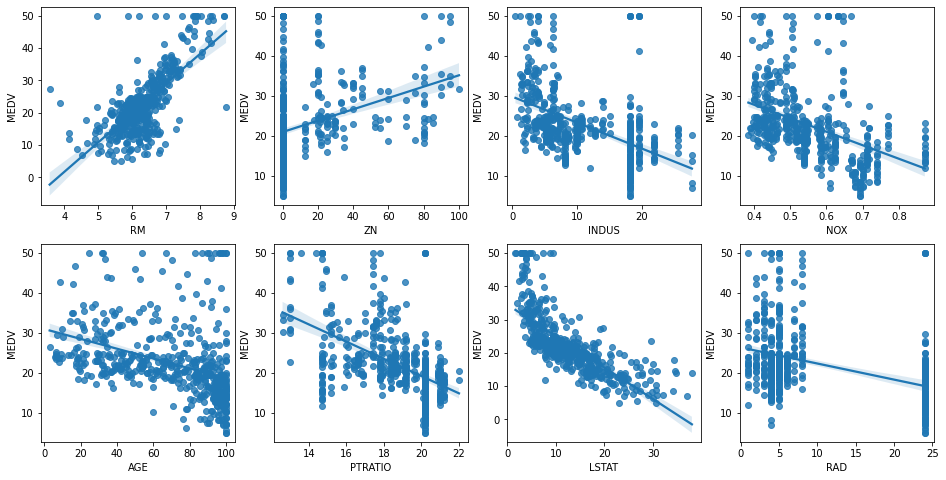

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y=target, data=Df , ax=axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = Df[['MEDV']]
X_data = Df.drop(['MEDV'], axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [ ]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: [40.99559517]
회귀 계수값: [[ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
   -0.6]]


In [ ]:
# # 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
# coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
# coeff.sort_values(ascending=False)

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = Df[['MEDV']]
X_data = Df.drop(['MEDV'], axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
